In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gambit as gb
import subprocess
import itertools

from sys import path
path.insert(0, 'lib')
from mediator_3player import mediator_3players

%load_ext autoreload
%autoreload 2

# Three player bargaining game
This is a straightforward generalisation of the 2-player bargaining game to 3 players. In order to keep things simple, we follow [Gallop 2017](https://journals.sagepub.com/doi/abs/10.1177/0951629816682884?journalCode=jtpa) and assume that players bargain over a scalar policy. Note that the model in this notebook differs slightly from the one of Gallop: while Gallop's model is one-shot, in our model there can be two periods in the case where one player is eliminated in a dyadic war. In the second period, the two remaining players bargain peacefully over the policy. We're assuming here for simplicity that the two remaining players always choose the unique split that wouldn't lead to war if costs were set to zero. Other choices do not alter the results.

As in the simple two-player model, using a moderator that proposes a policy $x_3$ at the start of the game. Varying the mediator's proposal allows us to explore the conditions for war and peace in a 3 player situation.

In [2]:
def get_payoffs(pure_profiles):
    payoffs = []
    for profile in pure_profiles:
        f = sum(profile.payoff())
        payoffs.append(float(f))
    return np.array(payoffs)

def is_peaceful(profile):
    return (profile[0] == 1) and (profile[3] == 1) and (profile[6] == 1)

def get_maxpayoff(profiles):
    V = get_payoffs(profiles)
    i = np.argmax(V)
    return V[i], is_peaceful(profiles[i]), profiles[i]

def get_profiles(G):
    return gb.nash.enumpure_solve(G._g, use_strategic=True)

def analyse(m, c, x, x3):
    G = mediator_3players(m, c, x, x3)
    profiles = get_profiles(G)
    return get_maxpayoff(profiles)

In this first scenario, there is a relatively large region peaceful region where total welfare is maximal.

In [3]:
c = np.ones(3) * 0.1
m = np.array([1.,1.,2.])
x = np.array([0.0, 0.3, 1.])
x3s = np.linspace(0, 1, 200)
Vmax, peace = np.array([analyse(m, c, x, x3)[:-1] for x3 in x3s]).T

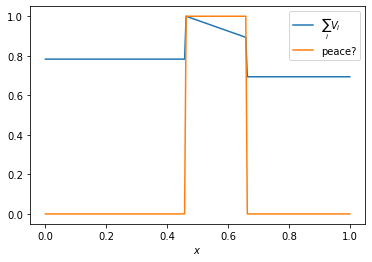

In [4]:
plt.plot(x3s, Vmax/max(Vmax), label='$\sum_i V_i$')
plt.plot(x3s, peace, label='peace?')
plt.xlabel('$x$')
plt.legend()
plt.show()

In this second scenario, there is only a tiny region where peace is possible.

In fact, it's possible to show that when $c_1=1$, peace is possible iff
$$
    -6(3c_0 + c_1 + 2c_2) < 2s_1 - 1 < 6(2c_0 + c_1 + 3c_2)
$$
Uncommenting the line below makes the left inequality break, and peace is no longer an outcome of the model.

In [5]:
x = np.array([0, 0.05, 1])
m = np.ones(3)
c = np.array([0.03, 1, 0.03])
c_scale_lim = 6*(3*c[0]+c[1]+2*c[2]) / (x[2]-2.*x[1])
c /= 1.0001*c_scale_lim
# c /= 0.9999*c_scale_lim

x3s = np.linspace(0, 1, 200)
Vmax, peace = np.array([analyse(m, c, x, x3)[:-1] for x3 in x3s]).T

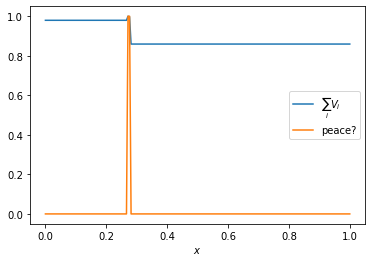

In [6]:
plt.plot(x3s, Vmax/max(Vmax), label='$\sum_i V_i$')
plt.plot(x3s, peace, label='peace?')
plt.xlabel('$x$')
plt.legend()
plt.show()